## Učitavanje baze, skidanje slikovnog materijala, treniranje i testiranje


In [1]:
from settings import *

# provjera postavki
import torch
print(f"CUDA is available: {torch.cuda.is_available()}.", f"Activated version of CUDA is {torch.version.cuda}.", torch.cuda.device(0))
print(f"Volta's gencode (sm_86) for RTX 3050 and 3070 is in arch_list: {'sm_86' in torch.cuda.get_arch_list()}.")

CUDA is available: True. Activated version of CUDA is 12.1. <torch.cuda.device object at 0x7f1db4cfe710>
Volta's gencode (sm_86) for RTX 3050 and 3070 is in arch_list: True.


In [2]:
# za pregled primjeraka slika u bazi WikiArta po kategoriji stila

# from utils.previewer import preview_image_grid
# preview_image_grid(df=pd.read_parquet("./data/wikiart_composed.parquet"), taste="Naturalism" ) # categories["depth"]["iconic"][4]

#### Skidanje slika po kategorijama


In [3]:
from utils.downloader import image_downloader
categories, deleted = image_downloader(base=database, categories=categories, sample_size=sample_size, image_size=image_size, skip_downloads=True)

deleted


 Neispravnih: 0


[]

#### Priprema DataLoaders-a za modele


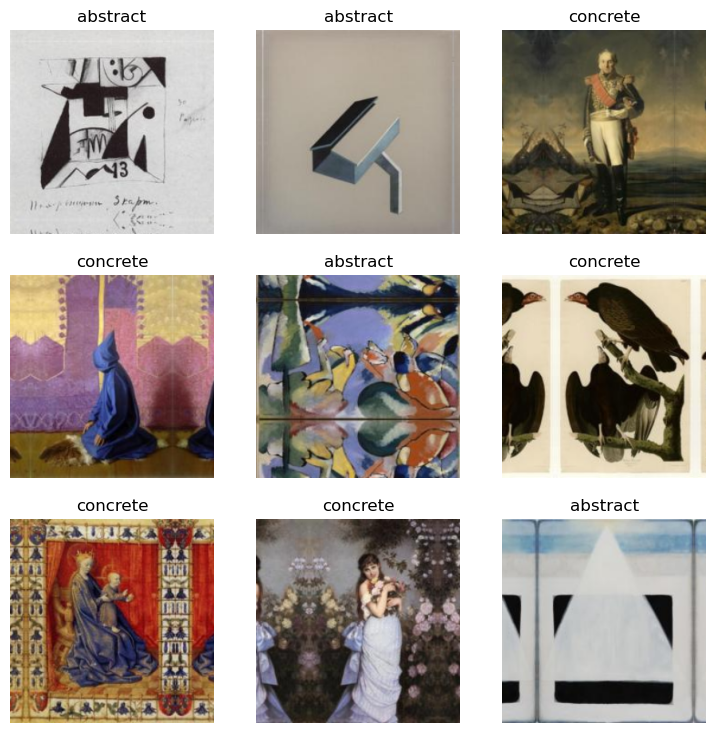

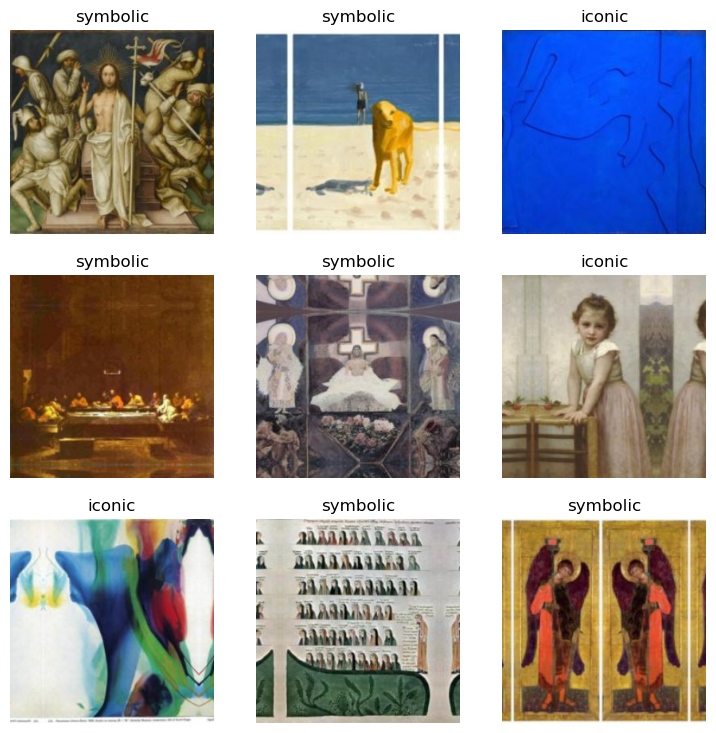

In [4]:
from utils.learners import create_dataloaders
dls = create_dataloaders(container, categories)

#### Izbor i trening modela na podatcima


In [5]:
from fastai.vision import models

>>> Preparing breadth! >>>


/home/trpquo/miniforge-pypy3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/trpquo/miniforge-pypy3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


>>> Preparing depth! >>>


Best learning rate for breadth 1x is 0.012054941663518547, because thats the μ of SuggestedLRs(minimum=0.02089296132326126, valley=0.0020892962347716093, slide=0.013182567432522774).
>>> Training breadth 1x! >>>


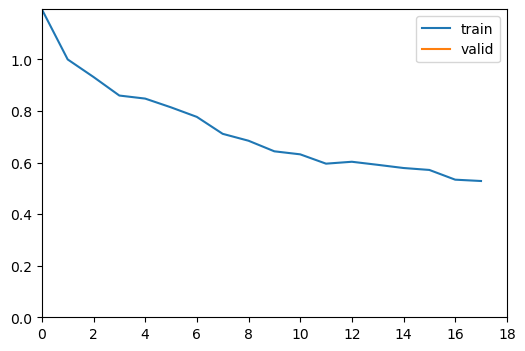

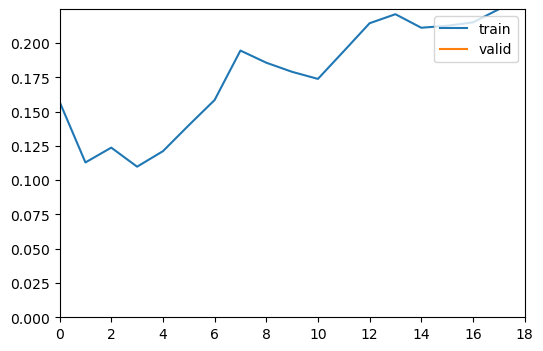

>>> Training depth 1x! >>>


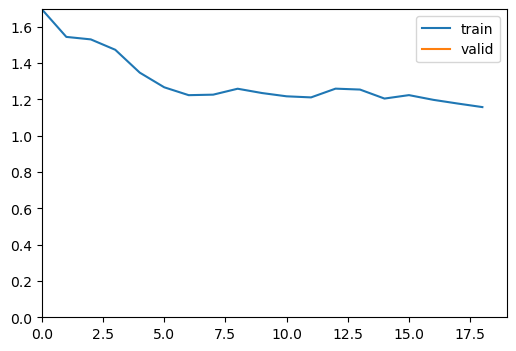

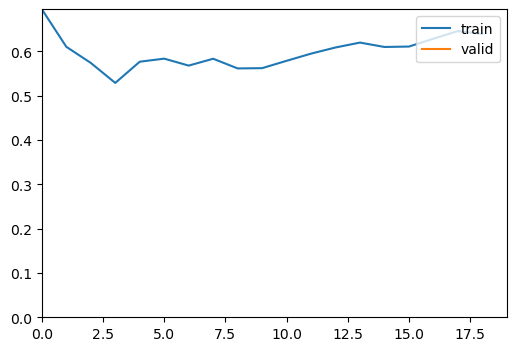

>>> Preparing breadth! >>>
>>> Preparing depth! >>>


/home/trpquo/miniforge-pypy3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/trpquo/miniforge-pypy3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Best learning rate for breadth 3x is 0.0169973077174897, because thats the μ of SuggestedLRs(minimum=0.03019951581954956, valley=0.001737800776027143, slide=0.019054606556892395).
>>> Training breadth 3x! >>>


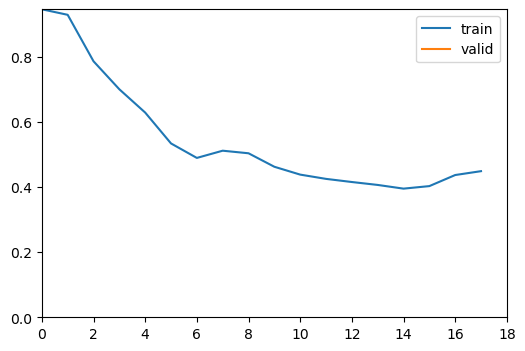

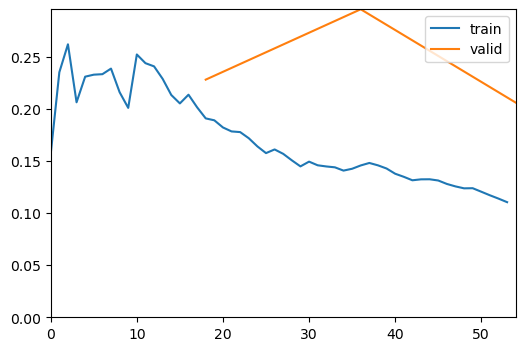

>>> Training depth 3x! >>>


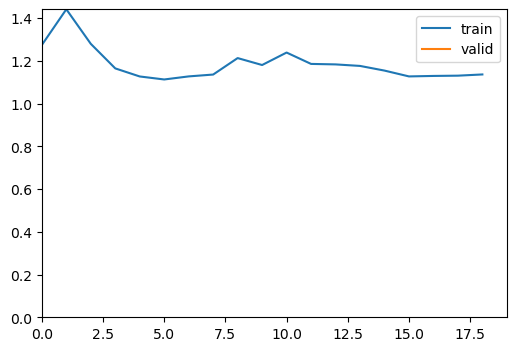

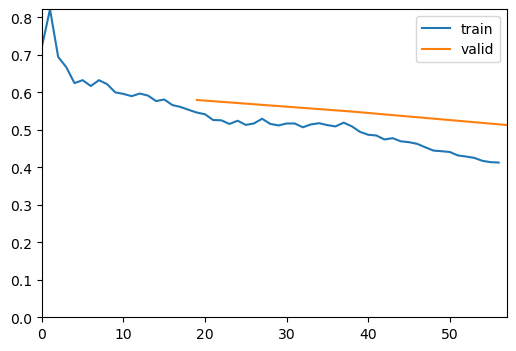

>>> Preparing breadth! >>>


/home/trpquo/miniforge-pypy3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/trpquo/miniforge-pypy3/envs/fastai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


>>> Preparing depth! >>>


Best learning rate for breadth 10x is 0.00984835159809639, because thats the μ of SuggestedLRs(minimum=0.017378008365631102, valley=0.0012022644514217973, slide=0.010964781977236271).
>>> Training breadth 10x! >>>


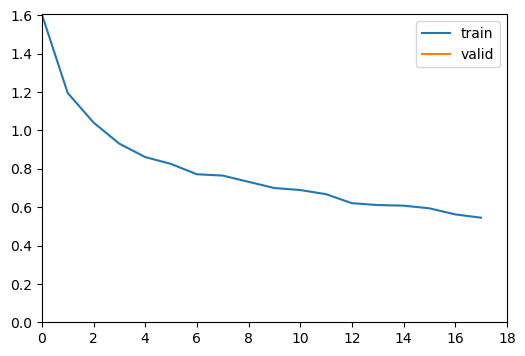

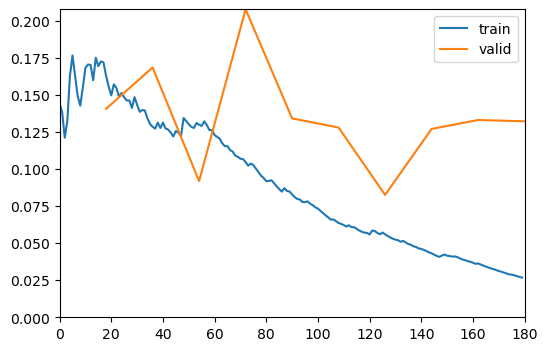

>>> Training depth 10x! >>>


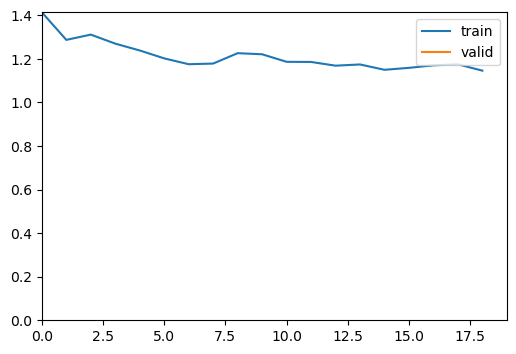

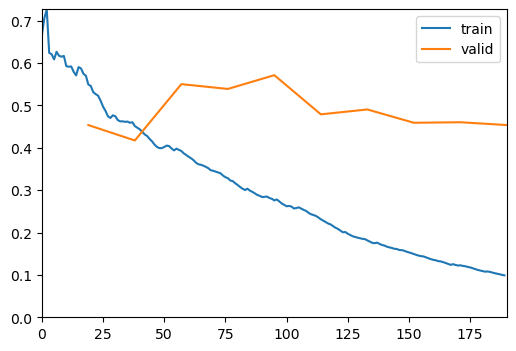

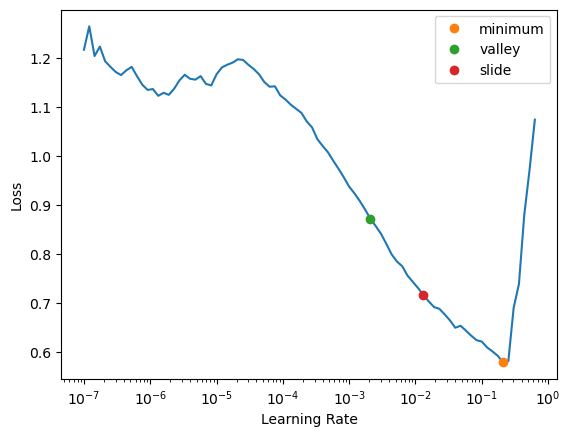

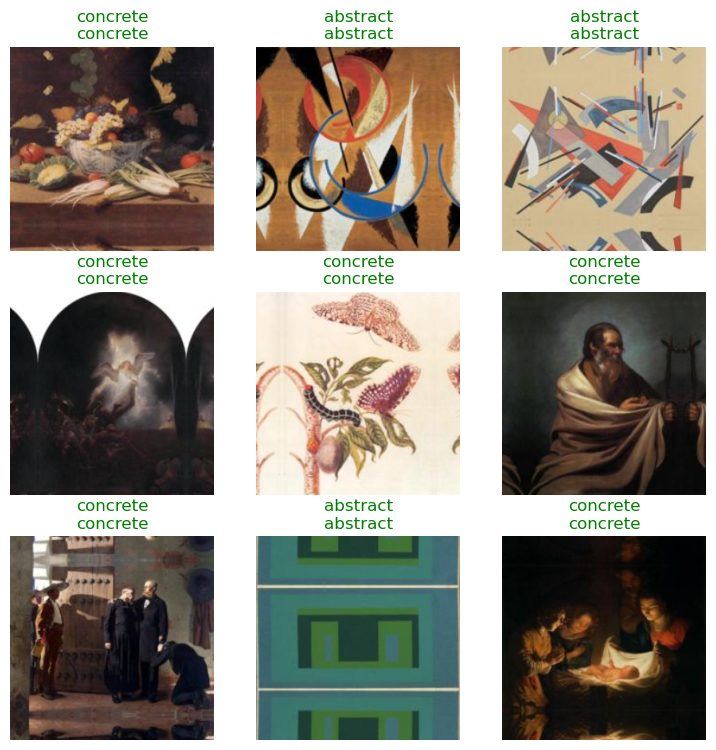

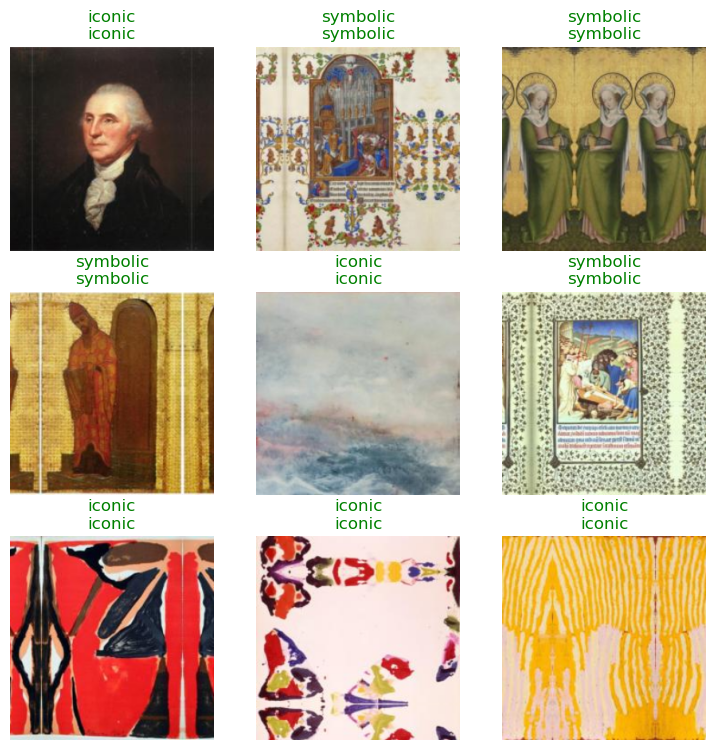

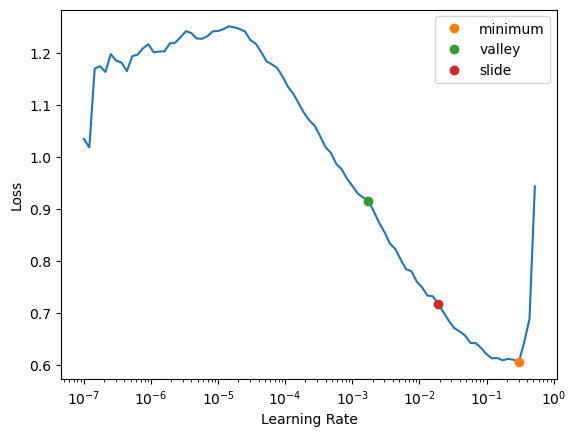

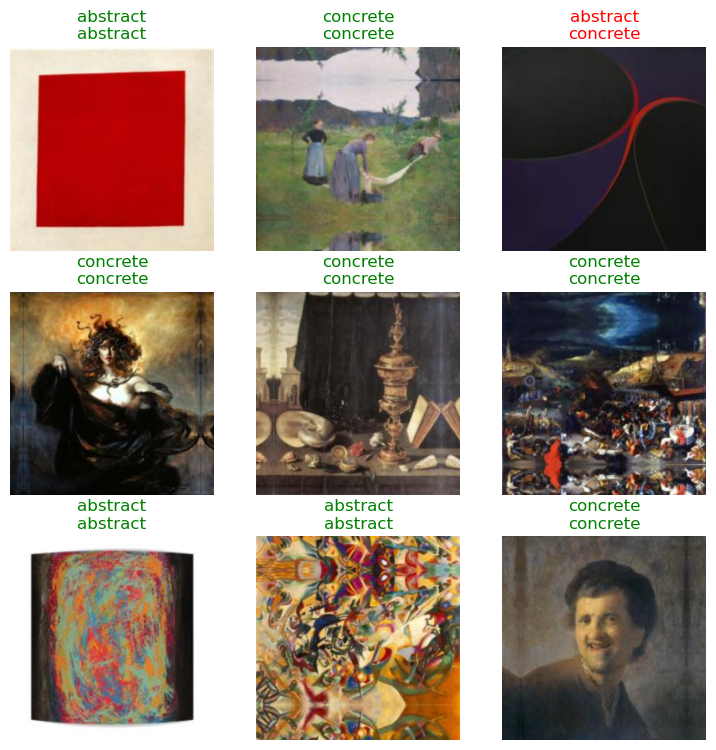

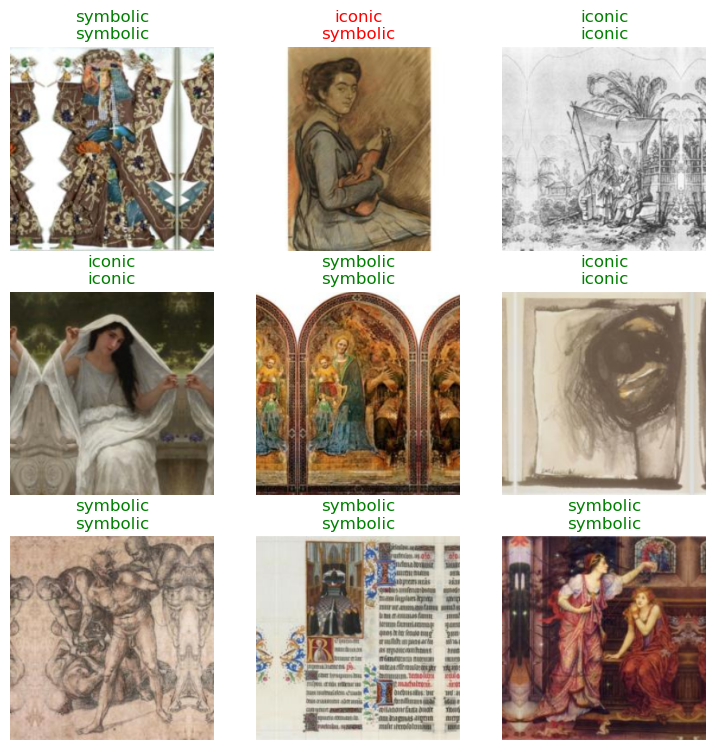

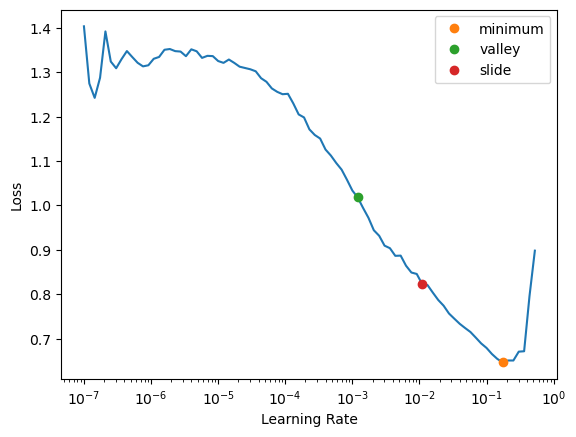

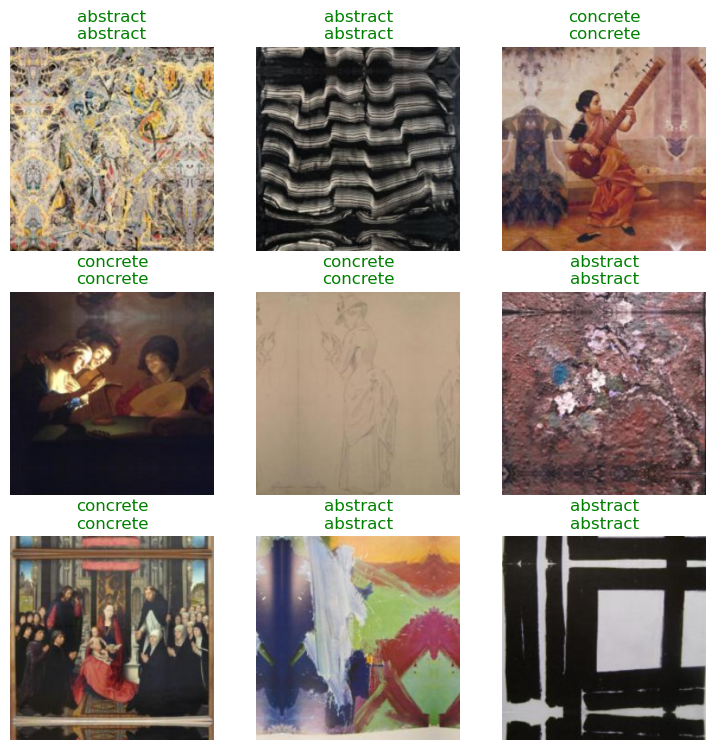

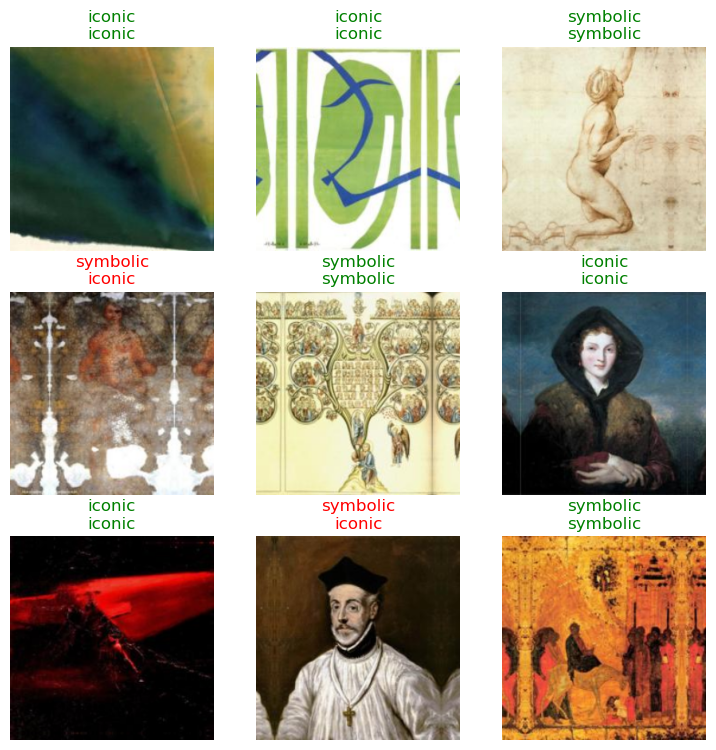

In [6]:
from utils.learners import create_learners, train_learners

model_picks = ["googlenet"]
learners = {}

for iteration_count in iteration_counts:
    for model_pick in model_picks:
        if model_pick.__contains__("xresnet"):
            model = getattr(models.xresnet, model_pick )    
        elif model_pick.__contains__("unet"):
            model = getattr(models.unet, "F" ) 
        elif model_pick.__contains__("tvm"):
            model = getattr(models.tvm, model_pick ) 
        else:
            model = getattr(models, model_pick ) 

        learners[f"{model_pick}_{iteration_count}x"] = create_learners(dls, model=model)

        train_learners(learners[f"{model_pick}_{iteration_count}x"], model_pick, iters=iteration_count, lr=None, show_results=True, export=True)


breadth <fastai.learner.Learner object at 0x7f1d39777490>
[[0.06465046107769012, 0.015625]]
depth <fastai.learner.Learner object at 0x7f1d3f35f150>
[[0.5590614676475525, 0.234375]]
breadth <fastai.learner.Learner object at 0x7f1d3979ab50>
[[0.22304591536521912, 0.078125]]
depth <fastai.learner.Learner object at 0x7f1d3962c690>
[[0.5612474679946899, 0.25]]
breadth <fastai.learner.Learner object at 0x7f1d92530b10>
[[0.29640963673591614, 0.0625]]
depth <fastai.learner.Learner object at 0x7f1d3983bf10>
[[0.404028981924057, 0.140625]]


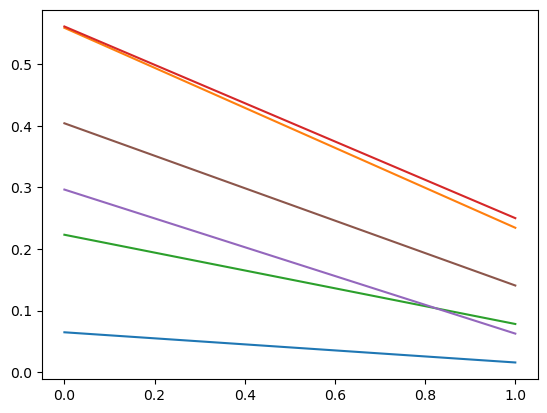

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from fastcore.utils import L 

for name, learner in learners.items():
    for dimension, model in learner.items():
        print(dimension, model)
        # model.recorder.plot_loses(title=f"{name}_{dimension}")
        print(model.recorder.values)
        plt.plot(model.recorder.values[0])

In [8]:
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *
@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    print(metrics)
    return
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()

In [9]:
for name, learner in learners.items():
    for dimension, model in learner.items():
        print(dimension, model)
        # model.recorder.plot_loses(title=f"{name}_{dimension}")
        model.recorder.plot_metrics()

breadth <fastai.learner.Learner object at 0x7f1d39777490>
[[0.06465046 0.015625  ]]
depth <fastai.learner.Learner object at 0x7f1d3f35f150>
[[0.55906147 0.234375  ]]
breadth <fastai.learner.Learner object at 0x7f1d3979ab50>
[[0.22304592 0.078125  ]]
depth <fastai.learner.Learner object at 0x7f1d3962c690>
[[0.56124747 0.25      ]]
breadth <fastai.learner.Learner object at 0x7f1d92530b10>
[[0.29640964 0.0625    ]]
depth <fastai.learner.Learner object at 0x7f1d3983bf10>
[[0.40402898 0.140625  ]]


In [10]:
from fastai.vision.widgets import ImageClassifierCleaner
import os


cleaners = {}
model_picks = next(os.walk("./models"))[1]
examplar = model_picks[2]

for dimension, learner in learners[examplar].items():
    # print(dimension, learner)
    cleaners[dimension] = ImageClassifierCleaner(learner)

In [11]:
cleaners["breadth"]

In [12]:
cleaners["depth"]

In [13]:
import shutil

for dimension, cleaner in cleaners.items():
    try:
        for idx in cleaner.delete(): cleaner.fns[idx].unlink()
        for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx], container/ dimension / cat))
    except Exception as ex:
        print(ex)